# Traitement des données des simulations

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pickle
import scipy
from scipy import signal
import sympy as sy
from IPython.display import display
from scipy.io.wavfile import write as wavWrite
import h5py
import ast
import os
import sys
import shutil
sy.init_printing()
#import tikzplotlib

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Settings pour les figures matplotlib
mpl.rcParams['figure.dpi'] = 72

#%matplotlib nbagg

FIGSIZE  = (10,5)
FONTSIZE = 30
TICK_FONTSIZE = 24
LEGEND_FONTSIZE = 22

font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)
plt.rc('text', usetex=True)
LATEX_FIG_PATH = "../01_FIGS/"
FIGS_PATH      = "02_figs/"
PPTY_XVBAR = {'c':  'r', 
              'linestyle':'-.', 
              'linewidth':0.75,
             }
PPTY_LEG = { 'fontsize' : 16,
             'loc'      : 'upper left',
           }

In [3]:
fmt = lambda s: r'%s_{%s}' % (s.split('_', 1)[0], s.split('_', 1)[1].replace('_', ''))

def export2tikzpdf(path, name):
    """ Exporte la figure courante dans un nouveau dossier,
    en y ajoutant un numéro unique, ordre croissant
    @args: path: chemin vers le dossier d'export
    @args: name: nom du dossier 
    """
    # Liste des dossier dans le path    
    list_dir = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        list_dir.extend(dirnames)
        break
        
        
    # Dans le cas où la liste de dossier est vide
    if not list_dir:
        list_dir.append(str(0))
    
    # Nombre le plus grand?
    for i in range(len(list_dir)):
        list_dir[i] = int(list_dir[i][0:2])
        
    # rajoute un zéro au debut si < 10 (formattage)
    new_fig_number = str(max(list_dir) + 1).zfill(2)

    full_path_new_dir = os.path.join(path, 
                                     str(new_fig_number) + '_' + name)
    
    # Création du nouveau dossier
    os.mkdir(full_path_new_dir)
    
    # Copie des fichiers de makefile + conteneur latex
    src_files = ['fig_main.tex', 'makefile']
    dst_files = ['','']
    for i in range(len(src_files)):
        dst_files[i] = os.path.join(full_path_new_dir, src_files[i])
        src_files[i] = os.path.join(path, src_files[i])
        shutil.copyfile(src_files[i], dst_files[i])

    # generation du fichier tikz
    tikz_file_path = os.path.join(full_path_new_dir,"fig.tex")
    tikzplotlib.save(tikz_file_path)
    
def next_power_of_2(x):  
    return 1 if x == 0 else 2**(x - 1).bit_length()

### Chargement des données

In [4]:
#%% Loading dataset
%store -r filename 
filename = '03_data/simu.05_19.13_51.h5'
print(filename)

fid = h5py.File(filename, 'r')
fid.flush()

metadata = fid["metadata"]
data     = fid["data_simu"]
model    = fid["model"]

date_now = metadata["date_now"][:]
config = ast.literal_eval(str(metadata["config"][0]))
print(*date_now)

03_data/simu.05_19.13_51.h5
5 19 13 51


In [6]:
SAVE_FIG = True
if SAVE_FIG:
    FOLDER_PATH = FIGS_PATH + "simu_{0}_{1}.{2}_{3}".format(*(str(val).zfill(2) for val in date_now))
    os.mkdir(FOLDER_PATH)

In [7]:
t = data["t"][:]
tmax = max(t)
indt = (t <= tmax) * (t >= 0.0)

N_ports, Nx, NW = model["Nu"][0], model["Nx"][0], model["Nw"][0]

In [8]:
#xbar = [t[300],]
#xbar = [0.1, 0.2]
xbar = [0.0771]

In [9]:
config

{'fs': 1000000.0,
 'path': '/home/victorw/ownCloud/IRCAM/03_DOCS/30_code_cpp_vocal_tract/vocalTractCpp/02_python/03_data',
 'lang': 'c++',
 'cmake': 'cmake',
 'grad': 'discret',
 'maxit': 20,
 'pbar': False,
 'split': False,
 'timer': True,
 'epsdg': 1.4901161193847656e-08,
 'eps': 2.220446049250313e-16}

In [10]:
volume_refs = [model["VT_subs"]["V_0_1"][()], model["VT_subs"]["V_0_2"][()]]
rho_refs    = [model["VT_subs"]["rho_0"][()], model["VT_subs"]["rho_0"][()]]

In [11]:
# On récupère les VT_subs
params_label = list(model["VT_subs"].keys())
ell_1 = model["VT_subs"]["ell_1"][()]

for label in params_label:
    value = model["VT_subs"][label][()]
    exec("%s = %f" % (label, value))
    print("%s = %f" % (label, value))

L_1 = 0.020000
L_10 = 0.020000
L_11 = 0.020000
L_12 = 0.020000
L_13 = 0.020000
L_14 = 0.020000
L_15 = 0.020000
L_16 = 0.020000
L_17 = 0.020000
L_18 = 0.020000
L_19 = 0.020000
L_2 = 0.020000
L_20 = 0.020000
L_3 = 0.020000
L_4 = 0.020000
L_5 = 0.020000
L_6 = 0.020000
L_7 = 0.020000
L_8 = 0.020000
L_9 = 0.020000
P_0 = 101325.000000
V_0_1 = 0.000003
V_0_10 = 0.000003
V_0_11 = 0.000003
V_0_12 = 0.000003
V_0_13 = 0.000003
V_0_14 = 0.000003
V_0_15 = 0.000003
V_0_16 = 0.000003
V_0_17 = 0.000003
V_0_18 = 0.000003
V_0_19 = 0.000003
V_0_2 = 0.000003
V_0_20 = 0.000003
V_0_3 = 0.000003
V_0_4 = 0.000003
V_0_5 = 0.000003
V_0_6 = 0.000003
V_0_7 = 0.000003
V_0_8 = 0.000003
V_0_9 = 0.000003
Z_ray = 2222.222222
ell_1 = 0.004375
ell_10 = 0.004375
ell_11 = 0.004375
ell_12 = 0.004375
ell_13 = 0.004375
ell_14 = 0.004375
ell_15 = 0.004375
ell_16 = 0.004375
ell_17 = 0.004375
ell_18 = 0.004375
ell_19 = 0.004375
ell_2 = 0.004375
ell_20 = 0.004375
ell_3 = 0.004375
ell_4 = 0.004375
ell_5 = 0.004375
ell_6 = 0.00437

--------------
## Entrées

KeyboardInterrupt: 

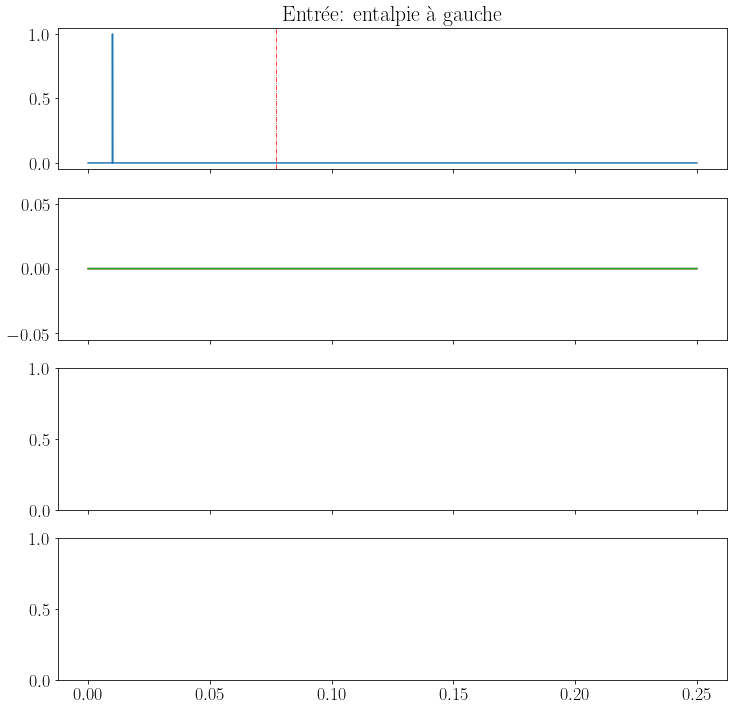

In [12]:
#%matplotlib nbagg
fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

## Entrées
ax = axs[0]
label = r'$%s$' % (model["u_label"][0])
ax.plot(t[indt], data["u"][indt,0], label=label)
ax.set_title('Entrée: entalpie à gauche')
for bar in xbar:
    ax.axvline(x=bar, **PPTY_XVBAR)

# Vitesses
ax = axs[1]
for i in range(1,N_ports):
    label = r'$%s$' % (model["u_label"][i])
    ax.plot(t[indt], data["u"][indt,i], label=label)
ax.set_title('Entrée: vitesses des parois')

for bar in xbar:
    ax.axvline(x=bar, **PPTY_XVBAR)

## Sorties: Forces

ax = axs[2]
label = r'$%s$' % (model["y_label"][0])
ax.plot(t[indt], data["y"][indt,0], label=label)
ax.set_title('Sortie: débit massique à gauche')

ax = axs[3]
for i in range(1, N_ports):
    label = r'$%s$' % (model["y_label"][i])
    ax.plot(t[indt], data["y"][indt,i], label=label)
ax.set_title('Sorties: forces aux parois')

for bar in xbar:
    ax.axvline(x=bar, **PPTY_XVBAR)


for bar in xbar:
    ax.axvline(x=bar, **PPTY_XVBAR)

for ax in axs.ravel():
    ax.legend(frameon=True, loc="upper right")
    ax.grid()

plt.tight_layout()
for bar in xbar:
    ax.axvline(x=bar, **PPTY_XVBAR)
    
if SAVE_FIG:
    title = "input_output"
    tmp_path = os.path.join(FOLDER_PATH,title)
    plt.savefig(tmp_path + '.png', format='png', dpi=300)
    plt.savefig(tmp_path + '.pdf', format='pdf')

----------
## Bilan de puissance et ports

In [13]:
# Calcule du bilan de puissance
N_diss = len(model["w_label"][:])
Pdiss = np.prod([data["w"][:,0],data["z"][:,0]], axis=0)
for i in range(1, N_diss):
    prod = np.prod([data["w"][:,i],data["z"][:,i]], axis=0)
    Pdiss = np.add(Pdiss, prod)

Pext = np.prod([data["u"][:,0],data["y"][:,0]], axis=0)
for i in range(1, N_ports):
    prod = np.prod([data["u"][:,i],data["y"][:,i]], axis=0)
    Pext = np.add(Pext, prod)

dEdt = np.prod([data["dxH"][:,0],data["dtx"][:,0]], axis=0)
for i in range(1,Nx):
    prod = np.prod([data["dxH"][:,i],data["dtx"][:,i]], axis=0)
    dEdt = np.add(dEdt, prod)

In [ ]:
fig = plt.figure(figsize=(12, 4))
ax = plt.gca()

# ---- Power balance --- #
ax.plot(t[indt], (Pdiss + dEdt)[indt])
ax.plot(t[indt], (-Pext)[indt], '--')
ax.set_title(r'Power balance', fontsize=16)
ax.grid()

ax.legend([r'$dE/dt + P_D$', '$-P_{ext}$'], loc="upper right")
ax.set_ylabel('Power (W)', fontsize=16)
ax.set_xlabel('Time (s)', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=10)
plt.ylim([-1e-4, 1e-3])

for bar in xbar:
    ax.axvline(x=bar, **PPTY_XVBAR)
plt.tight_layout()



if SAVE_FIG:
    title = "power_balance"
    tmp_path = os.path.join(FOLDER_PATH,title)
    plt.savefig(tmp_path + '.png', format='png', dpi=300)
    plt.savefig(tmp_path + '.pdf', format='pdf')

In [ ]:
(dEdt+Pext+Pdiss)[indt]

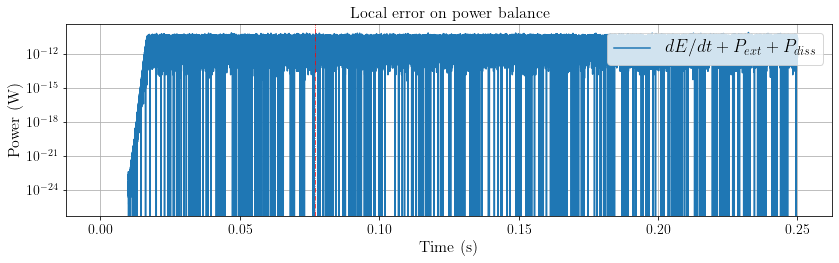

In [14]:
fig = plt.figure(figsize=(12, 4))
ax = plt.gca()

# ---- Power balance --- #
#ax.plot(t[indt], (dEdt+Pext+Pdiss)[indt])
ax.semilogy(t[indt], np.abs((dEdt+Pext+Pdiss)[indt]))
ax.set_title(r'Local error on power balance', fontsize=16)
ax.grid()

ax.legend([r'$dE/dt+P_{ext}+P_{diss}$'], loc="upper right")
ax.set_ylabel('Power (W)', fontsize=16)
ax.set_xlabel('Time (s)', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=10)

#ax.set_ylim([-1e-50,1e-50])

for bar in xbar:
    ax.axvline(x=bar, **PPTY_XVBAR)
plt.tight_layout()

if SAVE_FIG:
    title = "error_on_power_balance"
    tmp_path = os.path.join(FOLDER_PATH,title)
    #plt.savefig(tmp_path + '.png', format='png', dpi=300)
    plt.savefig(tmp_path + '.pdf', format='pdf')

## États

In [ ]:
if False:
    fmt = lambda s: r'$%s_{%s}$' % (s.split('_', 1)[0], s.split('_', 1)[1].replace('_', ''))
    fig, axs = plt.subplots(Nx, 1, sharex=True, figsize=(12,16*4))
    marker = '-'
    tmin = 0.1
    tmax = 0.101
    for i in range(Nx):
        label = fmt(str(model["x_label"][i]))
        label = r'$%s$' % label.replace('$', '')
        plt.sca(axs[i])
        plt.plot(t, data["x"][:,i], marker)
        # Cosmétique
        plt.legend([label], loc='upper left')
        plt.grid()
        plt.xlim([tmin, tmax])
        if not i:
            plt.title('x', fontsize=24)
        #barres verticales
        for bar in xbar:
            plt.axvline(x=bar, **PPTY_XVBAR)

    plt.tight_layout()

## Gradient

In [ ]:
if False:
    fmt = lambda s: r'$%s_{%s}$' % (s.split('_', 1)[0], s.split('_', 1)[1].replace('_', ''))
    fig, axs = plt.subplots(Nx, 1, sharex=True, figsize=(12,16*4))
    marker = '-'
    tmin = 0.1
    tmax = 0.101
    for i in range(Nx):
        label = fmt(str(model["x_label"][i]))
        label = r'dxH $%s$' % label.replace('$', '')
        plt.sca(axs[i])
        plt.plot(t, data["dxH"][:,i], marker)
        # Cosmétique
        plt.legend([label], loc='upper left')
        plt.grid()
        plt.xlim([tmin, tmax])
        if not i:
            plt.title('dxH', fontsize=24)
        #barres verticales
        for bar in xbar:
            plt.axvline(x=bar, **PPTY_XVBAR)

    plt.tight_layout()

--------------
## Observateurs

In [ ]:
print(model["y_label"][:])
print(model["w_label"][:])

In [ ]:
rho_refs[0]

In [ ]:
xlabel = model["x_label"][:]
for val,i in enumerate(xlabel):
    print("{} : {}".format(val, i))

## Représentation fréquentielle

In [ ]:
xlabel = model["x_label"][:]
for val,i in enumerate(model["w_label"]):
    print("{} : {}".format(val, i))

In [ ]:
xlabel = model["x_label"][:]
for val,i in enumerate(model["x_label"]):
    print("{} : {}".format(val, i))

In [ ]:
ind = 0
print(model['x_label'][0:11])
leg = list(model['x_label'][0:11])
plt.figure(figsize=FIGSIZE)
plt.plot(t[indt], data['x'][indt, 0:11])
plt.legend(['1', '2','3', '4', '5', '6','7', '8','9','10', '11'], loc='upper right')
plt.xlim()
plt.grid()

In [ ]:
%matplotlib nbagg
q_glotte  = data['dxH'][:,0]
q_levres  = data['w'][:,-1]

len_sig   = len(q_glotte)
fs        = config["fs"]

freq_max  = fs/2
Nfft      = int(next_power_of_2(len_sig))
freq_vec  = np.linspace(-fs/2, fs/2, Nfft) 
indf      = (freq_vec > 0) * (freq_vec < freq_max)
win       = scipy.signal.get_window('hann', len_sig)
#win       = signal.kaiser(len_sig, beta=14)

fft_qout = np.fft.fft(q_levres*win, Nfft)
fft_qin  = np.fft.fft(q_glotte*win, Nfft)
fft_H_shift = np.fft.fftshift(np.divide(fft_qout, fft_qin))
fft_shift_qout = np.fft.fftshift(fft_qout)

############
## FIGURE ##
fig = plt.figure(figsize=(14,5))
ax = plt.gca()

plt.plot(freq_vec[indf], 10*np.log10(np.abs(fft_H_shift[indf])), linewidth=3)
#plt.plot(freq_vec[indf], 10*np.log10(np.abs(np.fft.fftshift((fft_qout[indf])))), linewidth=3)
#plt.plot(freq_vec[indf], 10*np.log10(np.abs((fft_shift_qout[indf]))), linewidth=3)
plt.xlabel('Frequency (Hz)', fontsize=FONTSIZE)
plt.ylabel('$|H(f)|$(dB)', fontsize=FONTSIZE)

plt.ylim([-2, 20])
plt.xlim([0, 10000])
plt.title(r'Représentation freq $H(f)=\frac{q_{lips}}{q_{g}}$', fontsize=FONTSIZE)
plt.grid()

freq_bar = [460, 1920, 3260, 4910, 7050, 8860]
for bar in freq_bar:
    ax.axvline(x=bar, **PPTY_XVBAR)
    plt.annotate(r"{0} Hz".format(bar), 
                       (bar+50, 18),
                       #bbox=dict(boxstyle='Round', fc='white', ec='k', pad=0.4),
                       fontsize=20)

ax.tick_params(labelsize=TICK_FONTSIZE)
ax.minorticks_on()
plt.tight_layout()

if SAVE_FIG:
    title = "fonction_transfert_uL_vers_uR"
    tmp_path = os.path.join(FOLDER_PATH,title)
    plt.savefig(tmp_path + '.pdf', format='pdf')
    print('hehe')

In [ ]:
ind = 0
print(model['w_label'][ind])
plt.figure(figsize=FIGSIZE)
plt.plot(t[indt], -data['z'][indt,ind])
plt.plot(t[indt], data['w'][indt,ind]/10.)
for bar in xbar:
    plt.axvline(x=bar, **PPTY_XVBAR)
plt.grid()

In [ ]:
ind = 0
print(model['w_label'][ind])
plt.figure(figsize=FIGSIZE)
plt.plot(t[indt], -data['z'][indt,ind]*data['w'][indt,ind])
plt.grid()